In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("../dataset/carbon_emission_final_engineered.csv")

In [3]:
# Drop unnecessary columns
drop_cols = ['co2_per_km', 'co2_per_litre', 'efficiency_score', 'high_emitter', 'low_efficiency', 'co2_tier']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


In [4]:
# Define features and target
features = [
    'distance_in_km_per_route', 'vehicle_age_in_years', 'load_factor',
    'no_of_stop', 'average_speed_in_km_per_hr',
    'adjusted_fuel_efficiency_in_km_litre', 'adjusted_energy_kwh_per_km',
    'fuel_per_km', 'total_energy_kwh', 'speed_per_stop', 'load_utilization',
    'vehicle_type', 'fuel_type', 'traffic_condition', 'engine_norm_type',
    'logistics_partner', 'mode'
]
target = 'c02_emission_kg'

X = df[features]
y = df[target]

In [5]:
# Separate categorical and numerical columns
categorical = ['vehicle_type', 'fuel_type', 'traffic_condition', 'engine_norm_type', 'logistics_partner', 'mode']
numerical = [col for col in X.columns if col not in categorical]


In [6]:
# Preprocessor pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [7]:
# Create linear regression model pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train model
pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
# Predict
y_pred = pipeline.predict(X_test)

In [11]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



📊 Linear Regression Performance:
MAE: 37.30
RMSE: 101.83
R² Score: 0.8942


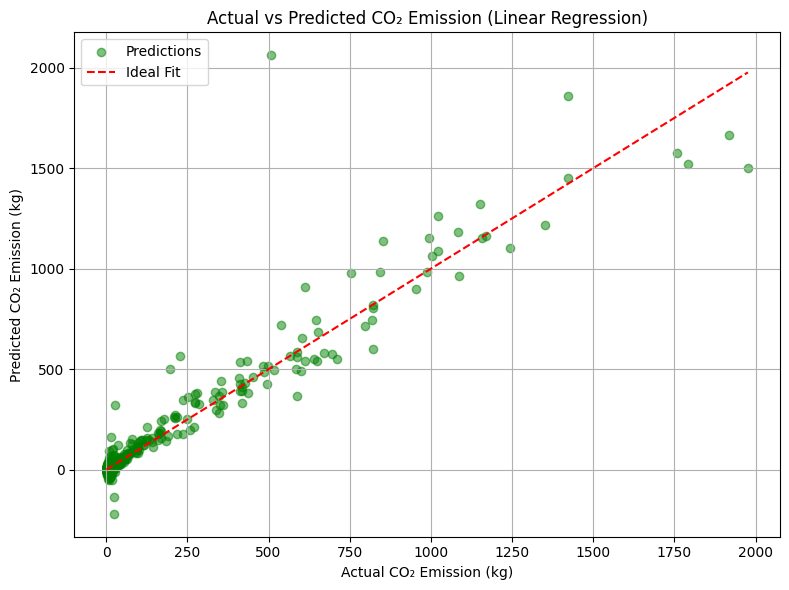

In [12]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual CO₂ Emission (kg)")
plt.ylabel("Predicted CO₂ Emission (kg)")
plt.title("Actual vs Predicted CO₂ Emission (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
